In [2]:
from function.function import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.EDA

### 1-1 데이터 소개

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Find : 1. LotFrontage, MasVnrArea 등 일부 데이터가 missing되었음

### 1-2 타겟 데이터 (SalePrice)

In [8]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

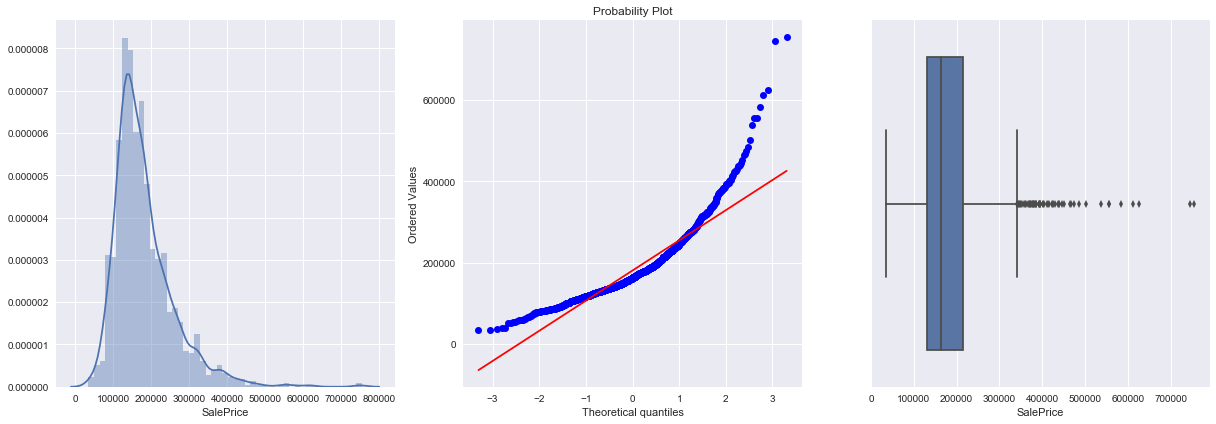

In [9]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

### 1-3  Analysis the univariance

In [9]:
# train = train.iloc[:,1:] #Id열 제거
train["MSSubClass"] = train["MSSubClass"].astype('str')   

In [10]:
# Categoric and Numerical 변수 분리
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [11]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### Numerical Features with SalePrice

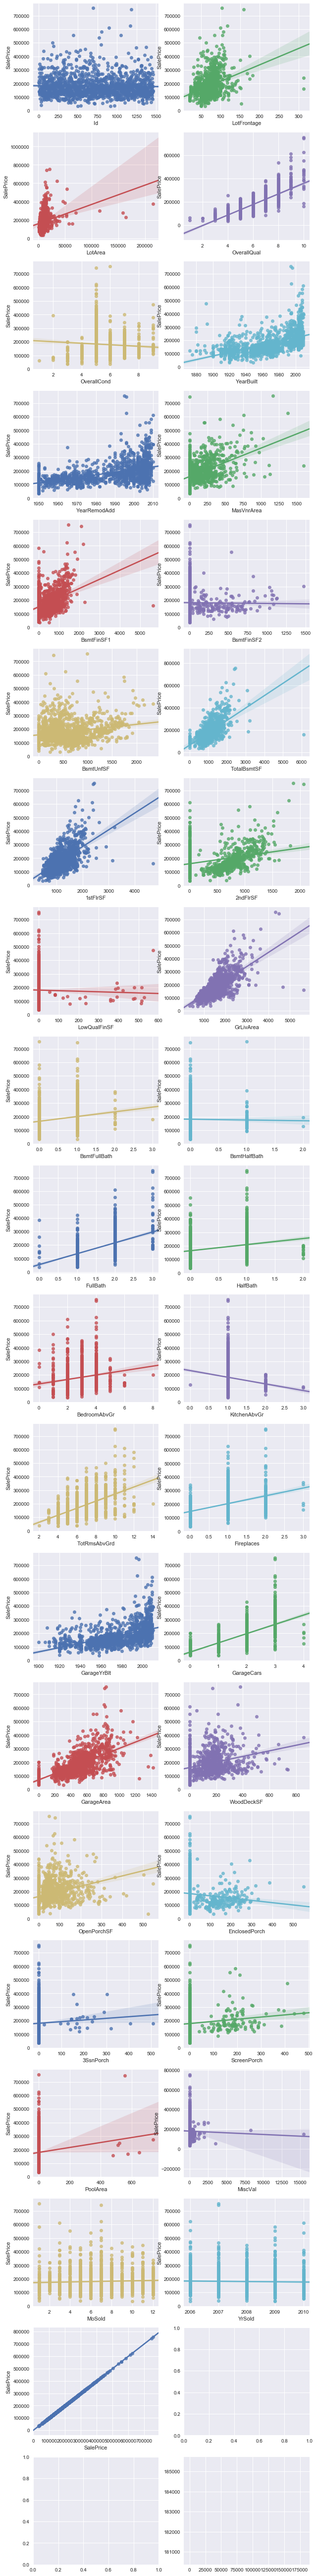

In [12]:
fig, ax = plt.subplots(20,2, figsize = (10,95))

for idx, n in enumerate(numerical_features):
    
    if idx % 2 == 0 :
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,0])
    
        
    else:
        sns.regplot(x=n, y="SalePrice",data=train, ax = ax[idx//2,1])

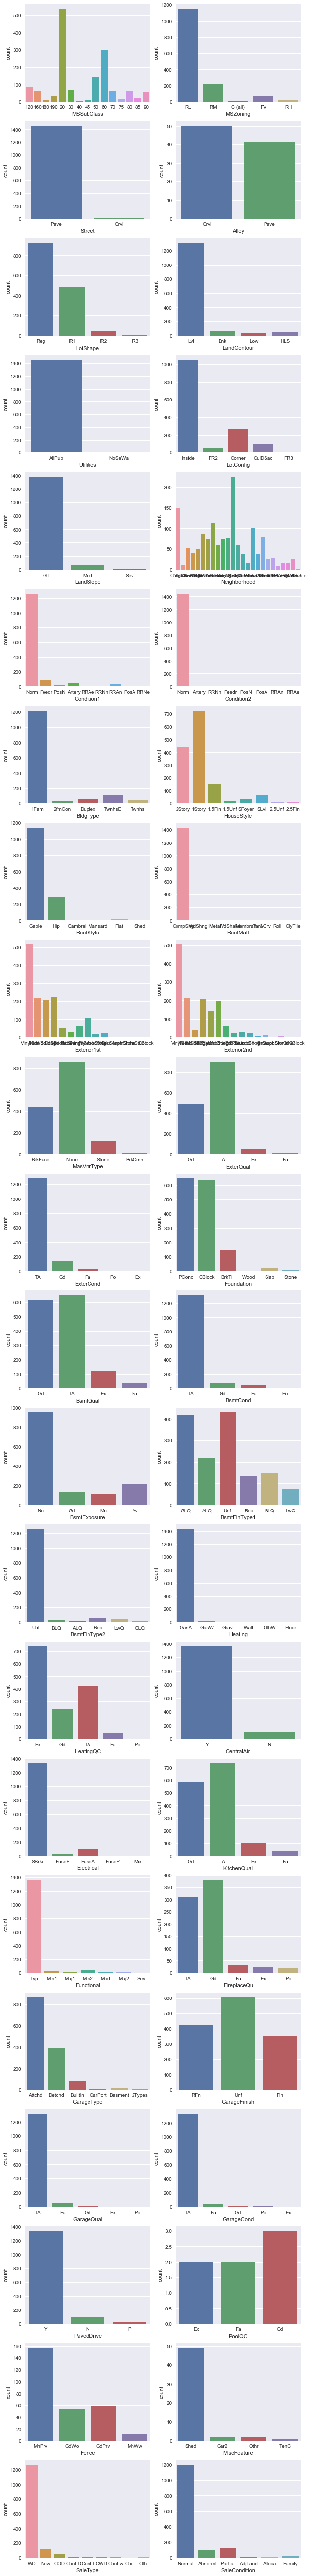

In [13]:
fig, ax = plt.subplots(22,2, figsize = (10,95))

for idx, n in enumerate(categorical_features):
    
    if idx % 2 == 0 :
        sns.countplot(x=n,data=train, ax = ax[idx//2,0])
  
    else:
        sns.countplot(x=n,data=train, ax = ax[idx//2,1])

## 2. Feature Engineering

### 2-1 SalePrice와 변수들 간의 관계

#### 2-1-1 GrLivArea  &  2ndFloor & Basement

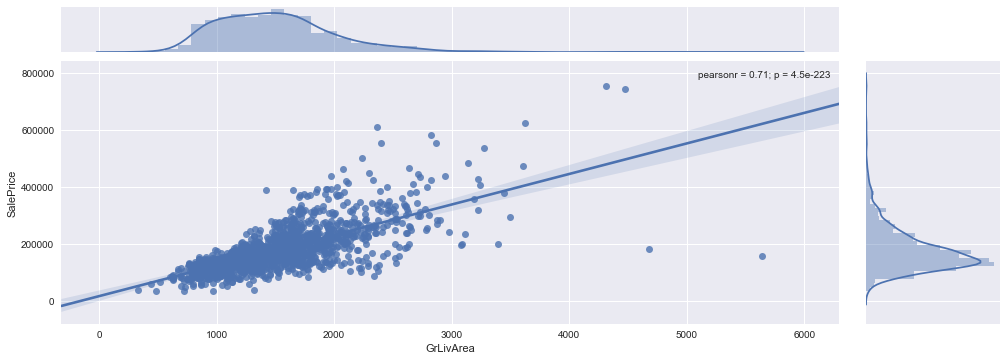

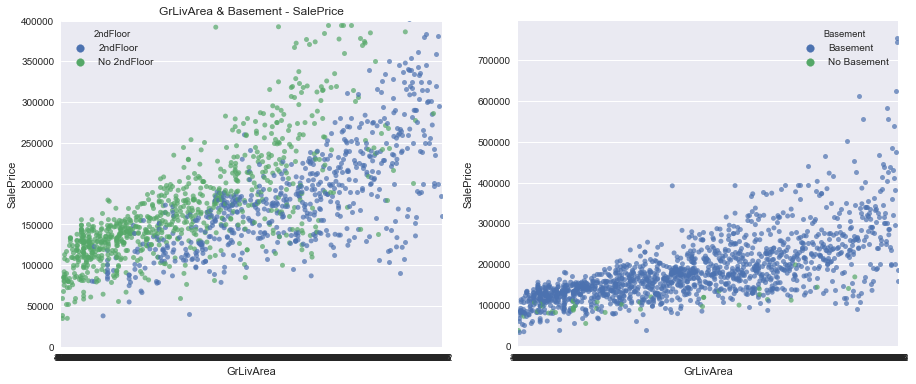

In [12]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

plt.figure(figsize = (15,6))

plt.subplot(121)
g = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(122)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLivArea & Basement - SalePrice')

plt.show()

In [31]:
def detect_outliers(data, feature):
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index.tolist()

    return outliers

In [32]:
GrLivArea_outliers = detect_outliers(train, "GrLivArea")
GrLivArea_outliers

[58,
 118,
 185,
 197,
 231,
 304,
 324,
 496,
 523,
 583,
 608,
 635,
 691,
 769,
 798,
 803,
 961,
 1024,
 1031,
 1046,
 1142,
 1169,
 1173,
 1175,
 1182,
 1268,
 1298,
 1312,
 1328,
 1353,
 1386]

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

#### 2-1-2 OverallQual & OverallCond

Text(0.5,1,'OverallCond - SalePrice')

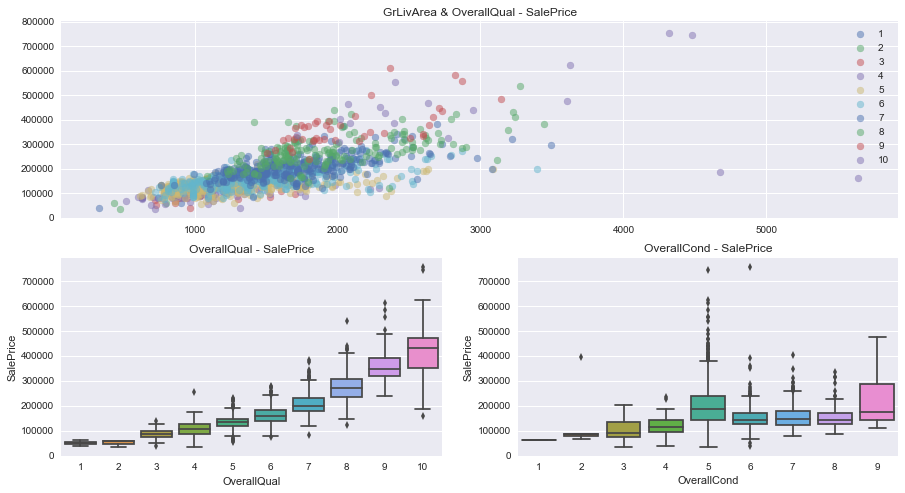

In [16]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

In [33]:
OverallQual_outliers = detect_outliers(train, "OverallQual")
OverallQual_outliers

[375, 533]

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

#### 2-1-2 GarageArea & GarageCars

No handles with labels found to put in legend.


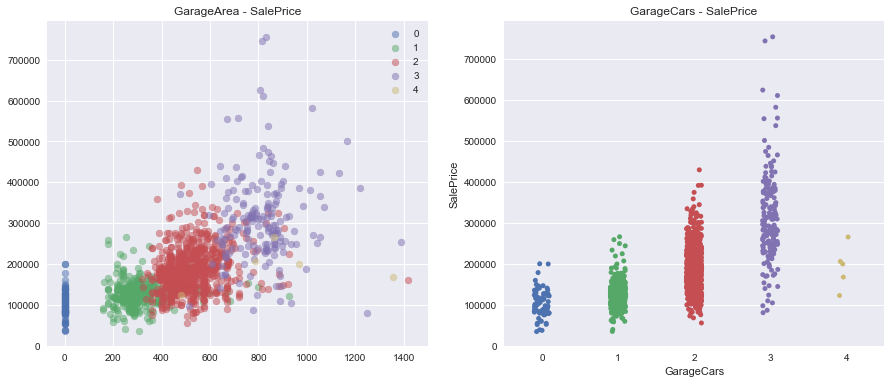

In [18]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

In [34]:
GarageCars_outliers = detect_outliers(train, "GarageArea")
GarageCars_outliers

[178,
 224,
 270,
 317,
 408,
 581,
 664,
 718,
 803,
 825,
 1061,
 1087,
 1142,
 1184,
 1190,
 1228,
 1241,
 1268,
 1298,
 1350,
 1417]

#### 2-1-3 Neighborhood

In [20]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

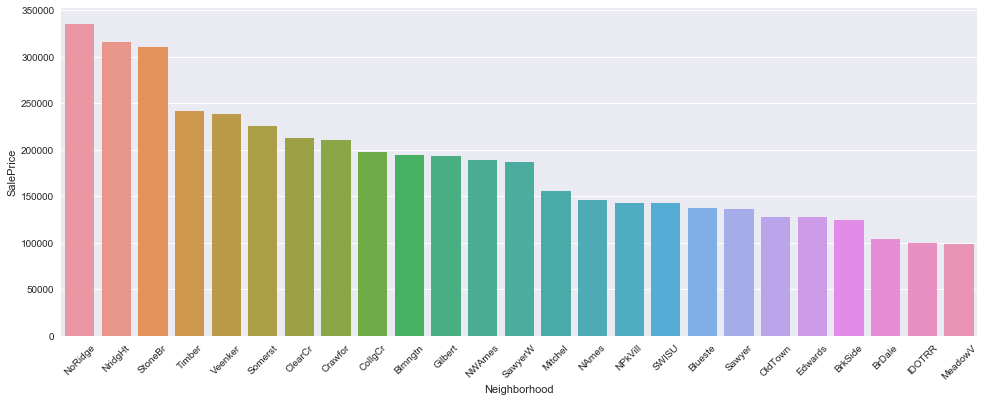

In [21]:
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [22]:
Neighbor_list=list(set(Neighbor["Neighborhood"]))

In [23]:
High_price_neighbor = ['NoRidge','NridgHt','StoneBr']
Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']

In [24]:
# def Gp_Neighbor(saleprice):
#     if saleprice > 250000:
#         return "first_group"
#     elif saleprice > 200000:
#         return "second_group"
#     elif saleprice > 150000:
#         return "third_group"
#     else: 
#         return "fourth_group"

In [25]:
# for n in Neighbor_list:
#     if n in High_price_neighbor:
#         High_price.append(n)
#     train[train["Neighborhood"] == n

# High_price_neighbor = train[train["Neighborhood"] == 'NoRidge','NridgHt','StoneBr'

In [26]:
# df_train = train.copy()
# df_train["Gp_Neighborhood"] = train["SalePrice"].apply(Gp_Neighborhood)
# g = sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=train, kind="bar")
# g.fig.set_size_inches(15,5)
# plt.show()

#### 2-1-4 YearBuilt

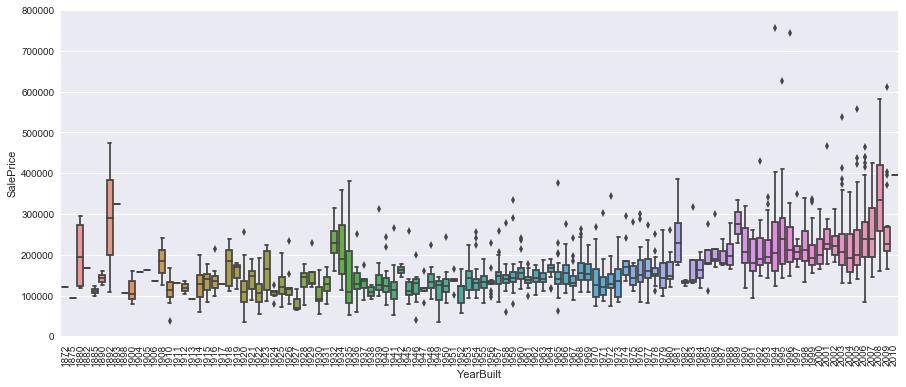

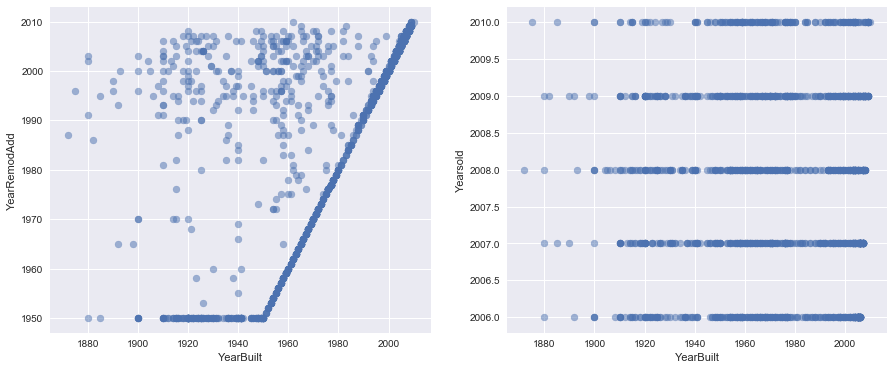

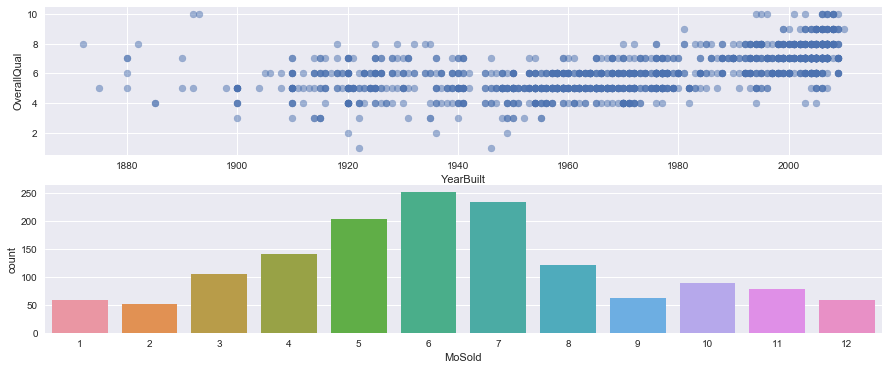

In [27]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('Yearsold')
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1. 1950년대 이후로 지어진 집부터는 대체로 최근에 지어진 집의 가격이 높음을 알 수 있음.
2. 아직 리모델링이 되지 않은 집은 지어진 년도와 같은 년도로 기록되어 있음.
3. 리모델링은 1950년도 이후에 시행되었으며 오래된 집들은 대부분 1950년도에 리모델링 되었다고 기록되어 있음.
4. 매매년도는 2006년부터 2010년까지의 기록으로 되어있으며, 매매가 가장 많았던 년도는 2009년임.
5. OverallQual이 8-10인 집은 대체로 1980년도 이후에 지어진 집임.
6. 날이 따뜻한 5, 6, 7월에 가장 매매가 활발하게 이루어짐.

#### 2-1-5 Fireplaces & FireplaceQu

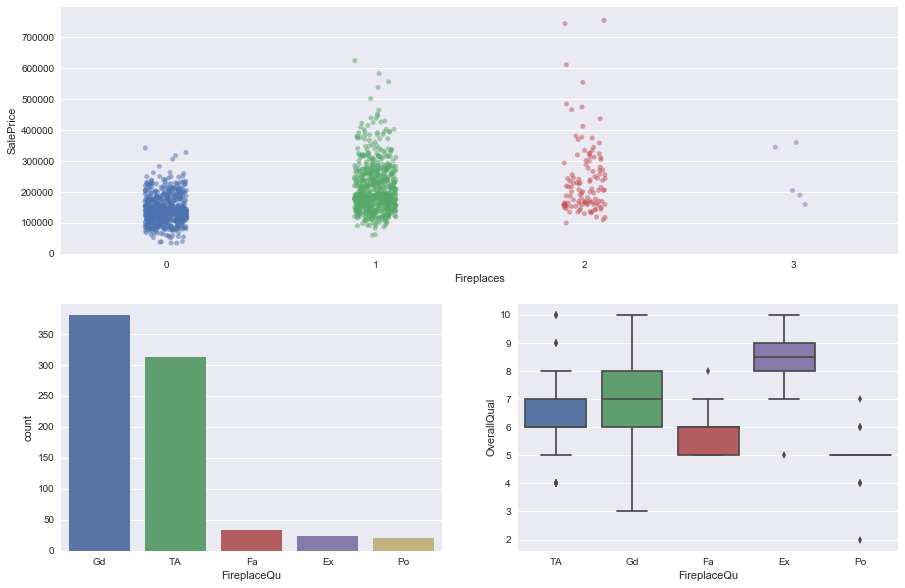

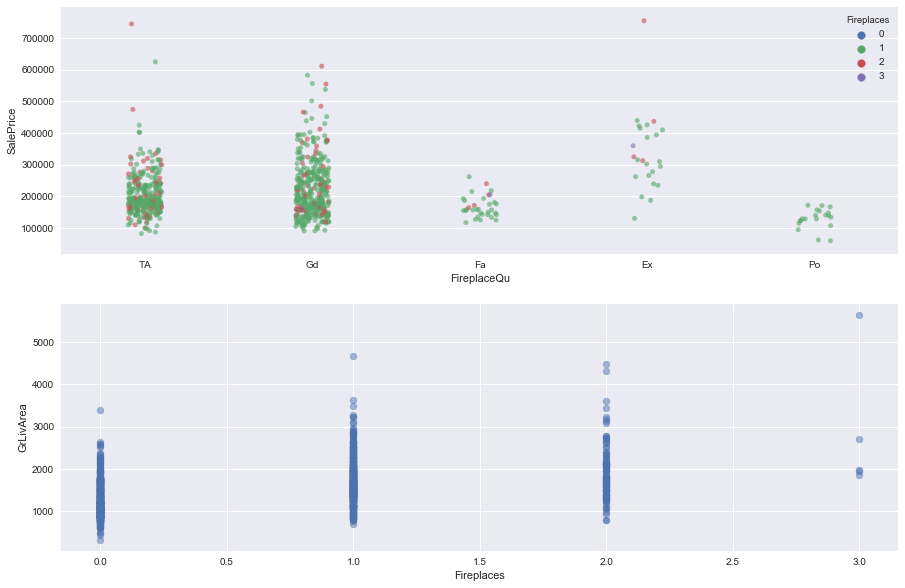

In [28]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.xlabel('Fireplaces')
plt.ylabel('GrLivArea')
plt.show()


Find

1. FirePlaces가 0개인 집과 1개인 집의 가격 차이가 있음을 볼 수 있음.
2. FireplaceQu와 OverallQual은 밀접한 관계가 있음.
3. FireplaceQu는 SalePrice에 많은 영향을 미친다고 볼 수는 없음.
4. 같은 GrLivArea임에도 Fireplaces의 갯수는 차이가 있음.

#### 2-1-6 BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

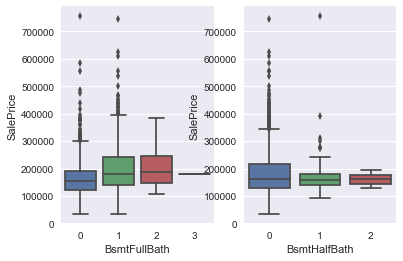

In [29]:
plt.subplot(121)
sns.boxplot(x = "BsmtFullBath", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BsmtHalfBath", y = "SalePrice", data=train)

In [30]:
# test = np.log1p(train.BsmtFullBath)
# stats.probplot(test, plot=plt)
# stats.probplot(train["BsmtFullBath"], plot=plt)
# stats.probplot(train["BsmtHalfBath"], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 2, 2, 3])),
 (0.42173550803653326, 0.4253424657534247, 0.8113909972300496))

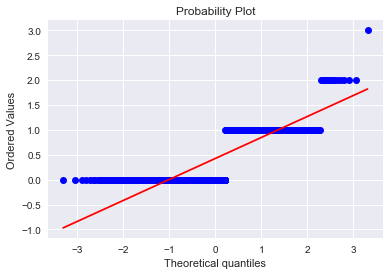

In [31]:
stats.probplot(train["BsmtFullBath"], plot=plt)

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

#### 2-1-7 TotRm and Bedroom

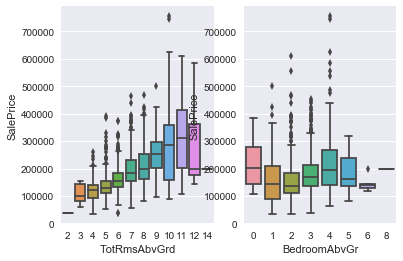

In [32]:
plt.subplot(121)
sns.boxplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data=train)

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 6, 6, 8])),
 (0.7527029527137685, 2.8664383561643834, 0.9211580913546914))

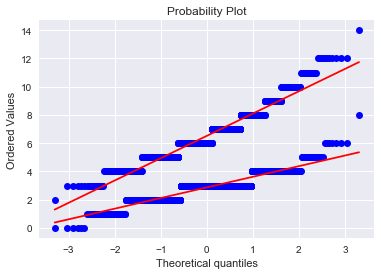

In [33]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120118dd8>,
      dtype=object)

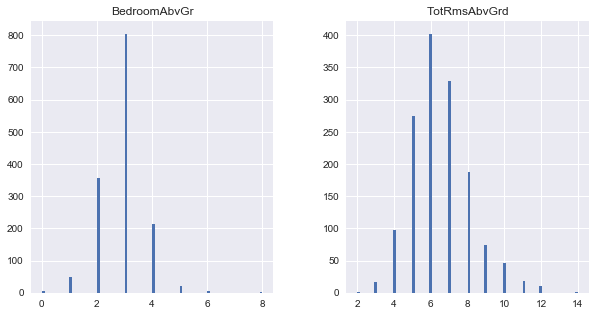

In [34]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 2-2 Missing Data 처리

In [10]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 80)


In [11]:
total = all_data.isnull().sum().sort_values(ascending=False)[:30]
ratio = ((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)[:30]
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data[:20]

,Total,Ratio
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071
GarageCond,159,5.447071


Text(0.5,1,'Percent missing data by features')

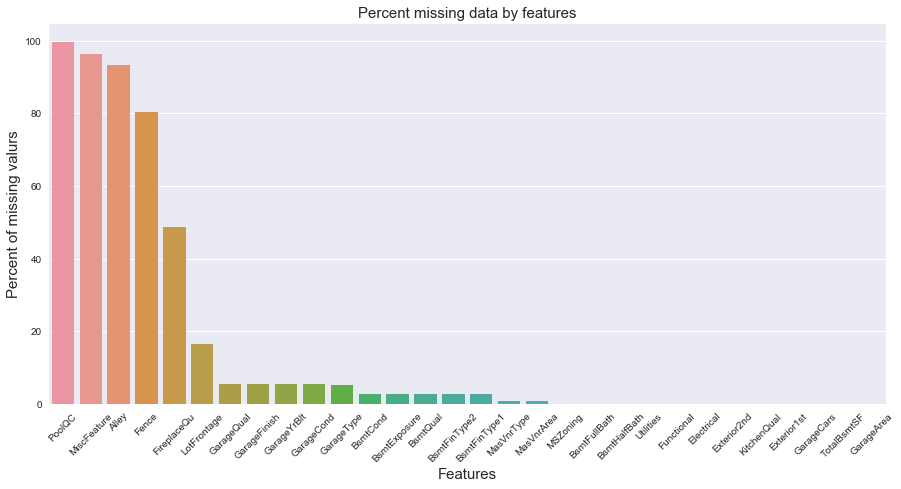

In [11]:
f, ax = plt.subplots(figsize=(15,7))
plt.xticks(rotation='45')
sns.barplot(x=ratio.index, y=ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing valurs', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

In [12]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [13]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning']= all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop('Utilities', axis=1)

all_data['Functional']= all_data["Functional"].fillna("Typ")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
all_data["Electrical"] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data["KitchenQual"]=all_data["KitchenQual"].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### 2-3 아웃라이어 제거

In [14]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [15]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [16]:
x_train_x0 = train.copy()

In [17]:
x_train = sm.add_constant(x_train_x0)
x_train = pd.get_dummies(x_train)

In [18]:
x_train.tail()

,const,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
1455,1.0,953,694,0,3,0.0,0.0,0.0,0.0,953.0,...,0,0,0,0,0,0,0,1,0,1
1456,1.0,2073,0,0,3,790.0,163.0,1.0,0.0,589.0,...,0,0,0,0,0,0,0,1,0,1
1457,1.0,1188,1152,0,4,275.0,0.0,0.0,0.0,877.0,...,0,0,0,0,0,0,0,1,0,1
1458,1.0,1078,0,0,2,49.0,1029.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1459,1.0,1256,0,0,3,830.0,290.0,1.0,0.0,136.0,...,0,0,0,0,0,0,0,1,0,1


In [19]:
x_train = pd.DataFrame(x_train.astype(float))
y_train = pd.DataFrame(y_train.astype(float))

x_train = np.array(x_train)
y_train = np.array(y_train)

In [20]:
model = sm.OLS(pd.DataFrame(y_train),pd.DataFrame(x_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.14
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:25:05   Log-Likelihood:                -16570.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1208   BIC:                         3.498e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1.047e+04   1.11e+05     -0.094      0.9

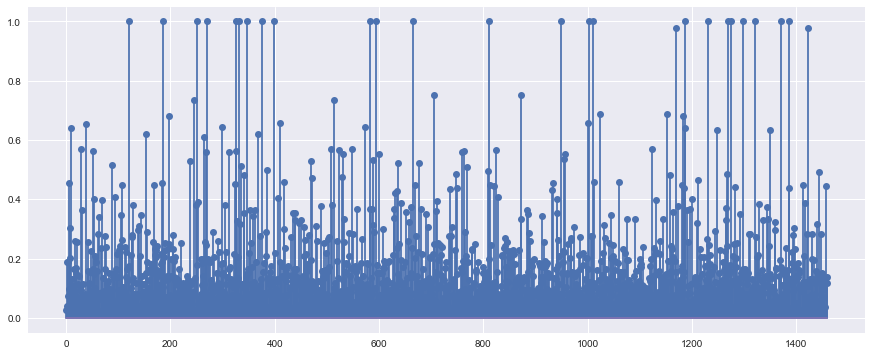

In [21]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(15,6))
plt.stem(hat)
plt.show()

In [22]:
hat.sum()

252.0000000000115

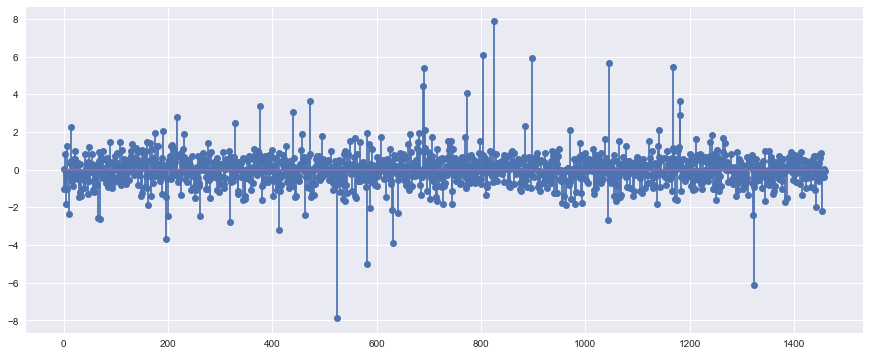

In [23]:
plt.figure(figsize=(15, 6))
plt.stem(result.resid_pearson)
plt.show()

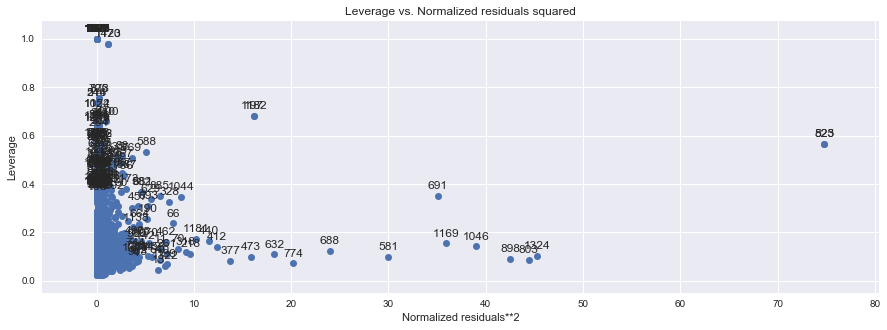

In [24]:
g = sm.graphics.plot_leverage_resid2(result)
g.set_size_inches(15,5)
plt.show()

In [41]:
# o2_x_train = x_train[result.resid > 4 *(316 / len(y_train))]
# print(len(o2_x_train))
# idx_r2 = np.where(result.resid > 4 *(316 / len(y_train)))[0]
# print(idx_r2)

725
[   0    2    6   12   13   14   18   19   21   22   26   27   31   40
   42   45   47   48   51   52   53   54   55   57   61   62   63   65
   67   68   71   73   74   76   77   78   82   83   84   88   92   94
   98   99  100  101  102  103  106  107  111  112  114  116  117  121
  123  124  126  127  128  129  130  131  134  136  137  138  139  140
  141  142  145  147  149  151  152  153  154  155  158  159  161  165
  169  170  172  173  175  176  177  178  180  181  183  186  187  188
  190  193  194  195  200  201  202  203  206  207  208  210  211  212
  214  215  217  218  222  225  227  228  229  230  231  235  236  238
  240  241  243  245  254  255  256  258  262  263  264  265  267  268
  269  270  275  277  278  283  288  289  291  292  293  296  299  301
  303  304  305  306  310  311  312  313  314  315  316  317  321  322
  323  326  328  331  333  336  337  338  339  344  352  355  356  358
  360  363  364  365  367  369  371  372  373  374  377  378  382  385
  

In [25]:
o_x_train = x_train[result.resid_pearson > 2]
print(len(o_x_train))
idx_r = np.where(result.resid_pearson > 2)[0]
print(idx_r)

21
[  13  190  218  328  377  440  473  688  691  693  774  803  825  885
  898  970 1046 1142 1169 1181 1182]


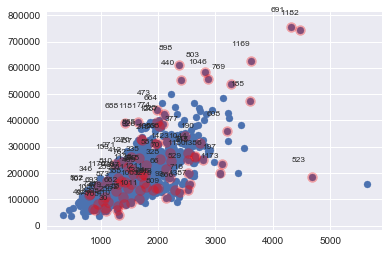

86 [  30   66   70   88   93  107  153  185  190  197  218  237  250  253
  271  318  326  328  335  346  367  375  377  398  410  412  440  457
  462  469  473  479  523  529  568  581  582  588  608  629  632  662
  664  666  681  688  691  693  705  716  736  747  762  769  774  803
  809  810  825  873  885  898  913  948  955 1000 1003 1011 1044 1046
 1138 1169 1170 1173 1180 1181 1182 1211 1267 1270 1275 1324 1359 1386
 1387 1423]


In [26]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - 316 - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(x_train_x0['GrLivArea'], y_train)
plt.scatter(x_train_x0['GrLivArea'][idx_c], y_train[idx_c], s=100, c="r", alpha=0.3)
utils.annotate_axes(range(len(idx_c)), idx_c, 
                    list(zip(x_train_x0['GrLivArea'][idx_c], y_train[idx_c])), [(-20, 15)] * len(idx_c), size="small", ax=ax)
plt.show()

print(len(idx_c),idx_c)

In [35]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers), resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers), cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers), GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers), OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers), GarageCars_outliers)

#제거하길 추천한 outliers(data description)
recommended_outliers = [523, 898, 1298]

# x_train_x0.drop[resid_outliers, axis='rows']
# y_train.drop[resid_outliers, axis='rows']

resid_outliers: 21 [13, 190, 218, 328, 377, 440, 473, 688, 691, 693, 774, 803, 825, 885, 898, 970, 1046, 1142, 1169, 1181, 1182]
	
cooks_outliers: 86 [30, 66, 70, 88, 93, 107, 153, 185, 190, 197, 218, 237, 250, 253, 271, 318, 326, 328, 335, 346, 367, 375, 377, 398, 410, 412, 440, 457, 462, 469, 473, 479, 523, 529, 568, 581, 582, 588, 608, 629, 632, 662, 664, 666, 681, 688, 691, 693, 705, 716, 736, 747, 762, 769, 774, 803, 809, 810, 825, 873, 885, 898, 913, 948, 955, 1000, 1003, 1011, 1044, 1046, 1138, 1169, 1170, 1173, 1180, 1181, 1182, 1211, 1267, 1270, 1275, 1324, 1359, 1386, 1387, 1423]
	
(IQR)GrLivArea_outliers: 31 [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]
	
(IQR)OverallQual_outliers 2 [375, 533]
	
(IQR)GarageCars_outliers: 21 [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


### Select Variables

In [25]:
idx_t = np.where(result.pvalues < 0.05)[0]
print(len(idx_t), idx_t)
tvalues = idx_t.tolist()

42 [  1   2   4   5  11  13  16  19  20  22  24  28  29  30  31  33  34  35
  36  88  89  90 163 173 245 246 250 251 253 254 255 261 268 269 270 271
 272 273 274 276 278 284]


In [26]:
train = all_data[:ntrain]
x_train_x0 = train.copy()
x_train = sm.add_constant(x_train_x0)
x_train = pd.get_dummies(x_train)
x_train = pd.DataFrame(x_train.astype(float))

x_train_cols = x_train.columns.tolist()

select = []

for i in tvalues:
    select.append(x_train_cols[i])

print(len(select), select)

42 ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'Fireplaces', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MasVnrArea', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'GarageCond_Ex', 'GarageQual_Ex', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_None', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofStyle_Shed']


### Skewness

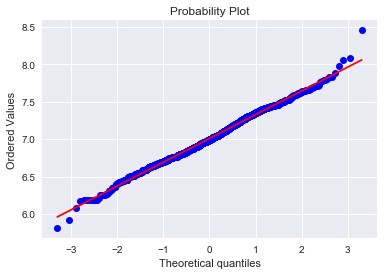

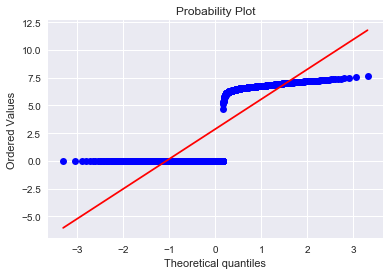

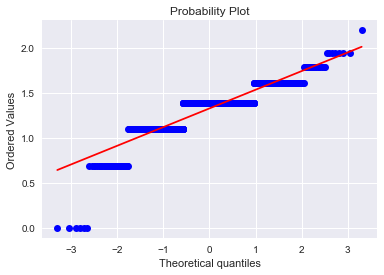

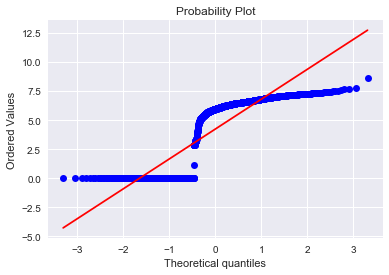

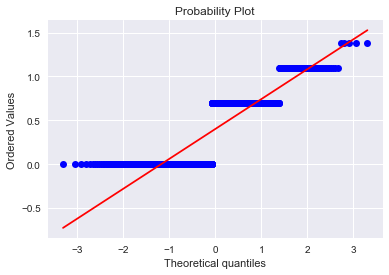

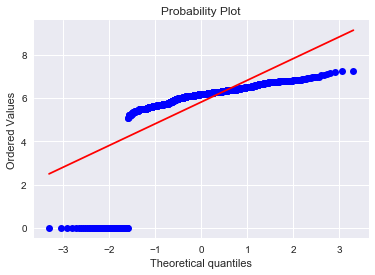

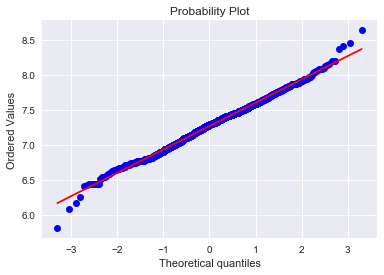

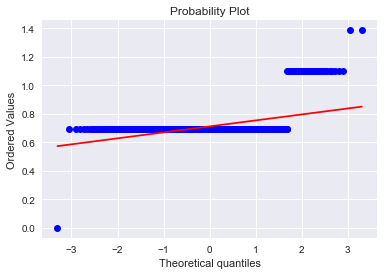

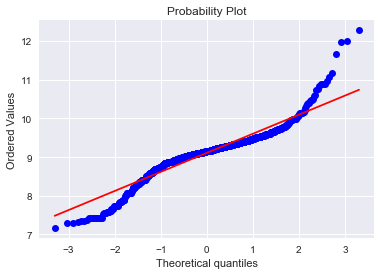

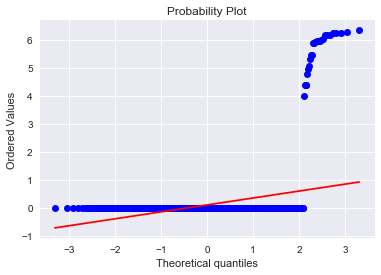

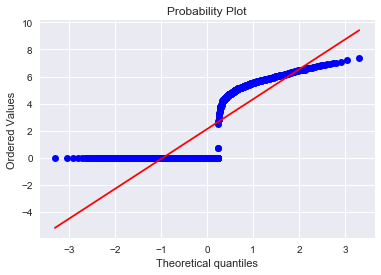

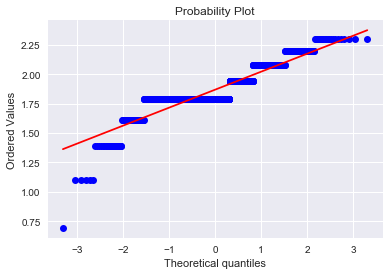

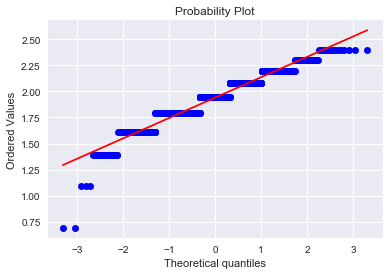

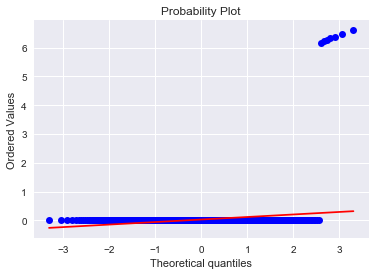

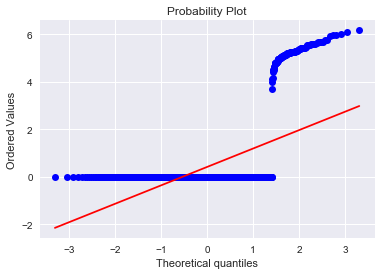

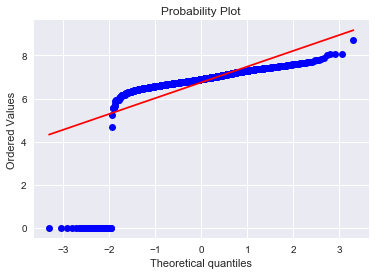

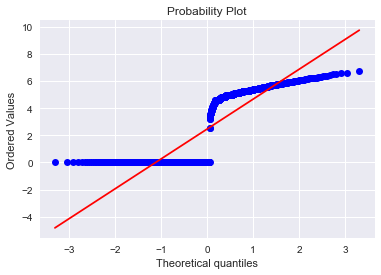

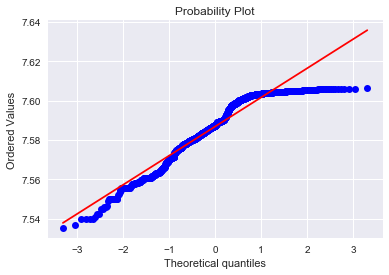

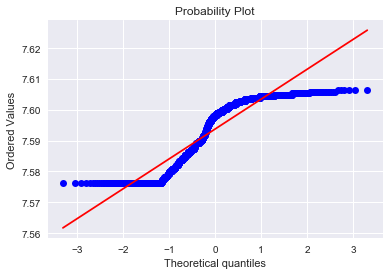

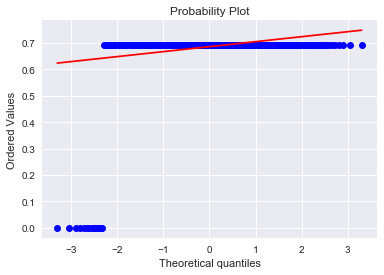

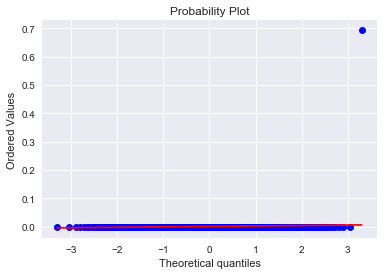

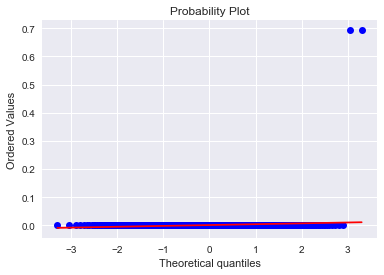

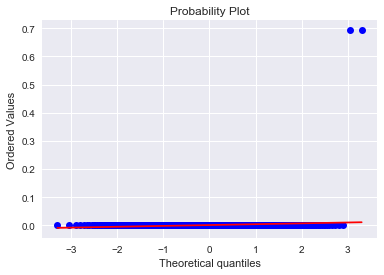

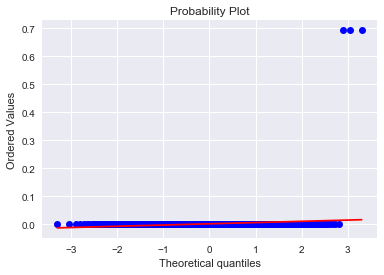

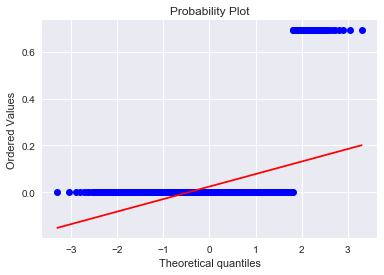

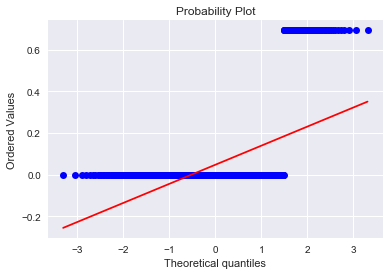

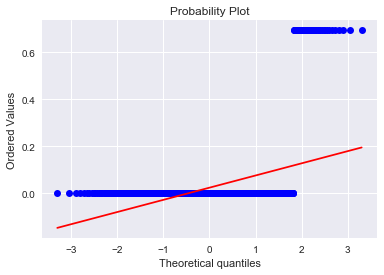

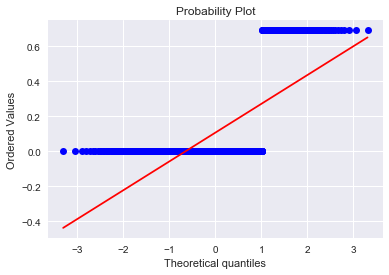

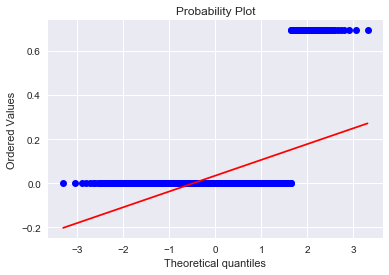

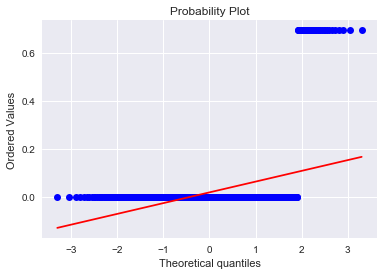

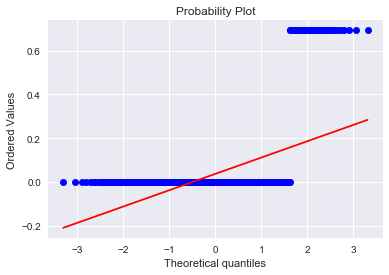

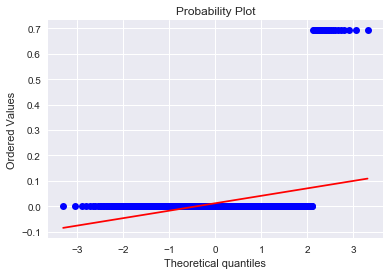

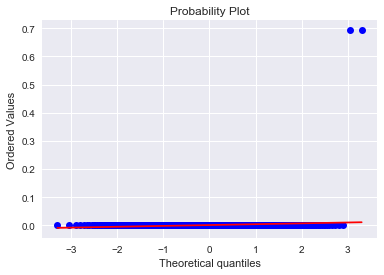

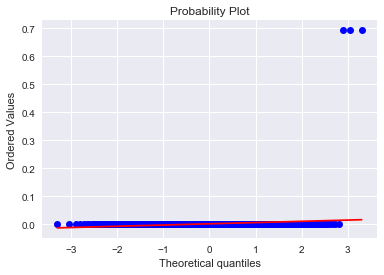

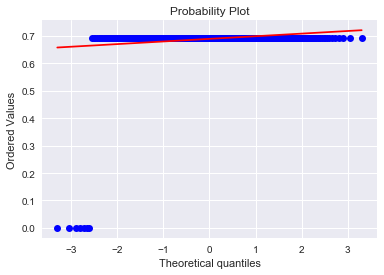

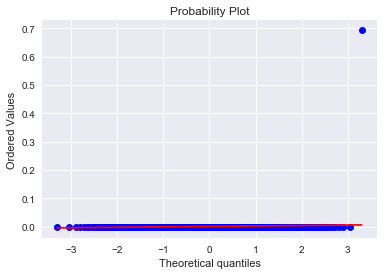

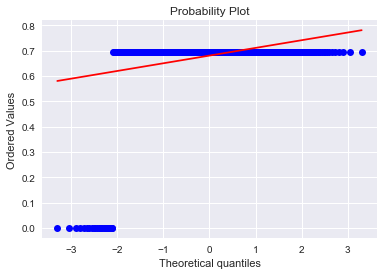

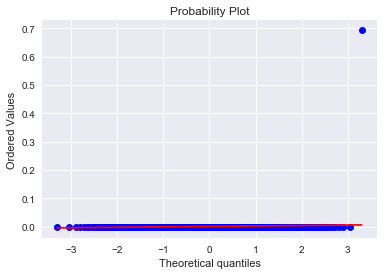

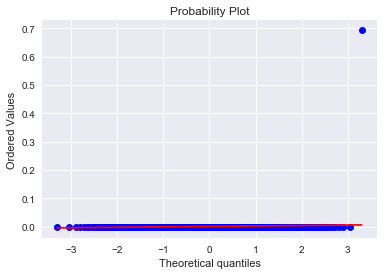

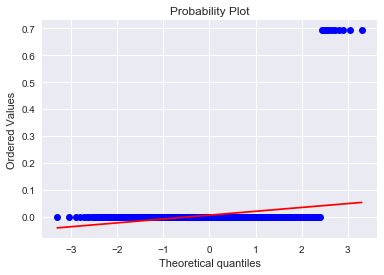

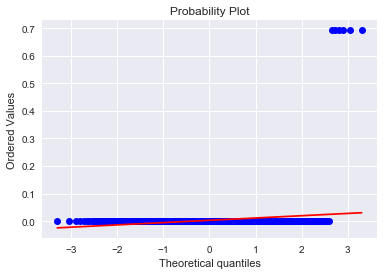

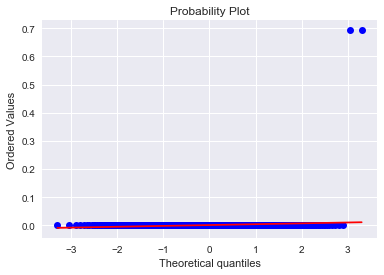

In [27]:
for c in select:
    x_train[c] = np.log1p(x_train[c])
    fig = plt.figure()
    QQ = stats.probplot(x_train[c], plot=plt)
    plt.show()

In [28]:
model = sm.OLS(pd.DataFrame(y_train),pd.DataFrame(x_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     55.30
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:25:47   Log-Likelihood:                -16694.
No. Observations:                1460   AIC:                         3.390e+04
Df Residuals:                    1206   BIC:                         3.524e+04
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.238e+